In [1]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv


--2022-04-05 15:10:37--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.194
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3501243 (3.3M) [text/csv]
Saving to: ‘text_2_clean.csv.5’

text_2_clean.csv.5  100%[===================>]   3.34M  3.68MB/s    in 0.9s    

2022-04-05 15:10:38 (3.68 MB/s) - ‘text_2_clean.csv.5’ saved [3501243/3501243]



In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
df = pd.read_csv('text_2_clean.csv')
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [4]:
#!pip install dtale --quiet

In [4]:
df['text'].to_list()

[' I`d have responded, if I were going',
 ' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 'http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth',
 '2am feedings for the baby are fun when he is all smiles and coos',
 'Soooo high',
 ' Both of you',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 ' as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff',
 'I really really like the song Love Story by Taylor Swift',
 'My Sharpie is running DANGERously low on ink',
 'i want to go to music tonight but i lost my voice.',
 'test test from the LG enV2',
 'Uh oh, I am sunburned',
 ' S`ok, trying to plot alternatives as we speak *sigh*',
 'i`ve been sick for the past few days  and thus, my hair looks wierd.  if i didnt have a hat on i

In [5]:
df['text'].isnull().sum()

1

In [6]:
df.shape

(27481, 4)

In [7]:
import re
from nltk.stem import WordNetLemmatizer
from collections import Counter
import nltk
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df['text'] = df['text'].fillna('').apply(str)
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(lambda x: re.sub('http\S+','',x))

In [9]:
printable = r'\w \!\"#\$%&\'\(\)\*\+,\-\./:;<»«؛،ـ\=>\?@\[\\\]\^_\`\{\|\}~'
df['text'] = df['text'].str.replace(r'[^{}]+'.format(printable), '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [10]:
df["text"] = df["text"].apply(lambda x: re.sub('\w*\d\w*"','',x))
df["text"] = df["text"].apply(lambda x: re.sub('[.,!?:;-=...@#_]','',x))
df["text"] = df["text"].str.replace('[^\w\s]','')
df["text"] = df["text"].str.replace('\d+', '')
df["text"] = df["text"].str.replace(' +',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [11]:
#Lemmatization

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()


In [12]:
df['text'].apply(lambda document:' '.join([lemma.lemmatize(word) for word in nltk.word_tokenize(document)]))

0                        id have responded if i were going
1               sooo sad i will miss you here in san diego
2                                    my bos is bullying me
3                            what interview leave me alone
4        son of why couldnt they put them on the releas...
                               ...                        
27476    wish we could come see u on denver husband los...
27477    ive wondered about rake to the client ha made ...
27478    yay good for both of you enjoy the break you p...
27479                                   but it wa worth it
27480     all this flirting going on the atg smile yay hug
Name: text, Length: 27481, dtype: object

In [ ]:
listatext = df["text"].to_list()
listatext

In [14]:
from wordcloud import WordCloud, STOPWORDS

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
lista1= list(stopwords.words('english'))

In [17]:
new_stopwords = ['yyyyyyyyyoooooooooouuuuu','sweeeeet','sooo','aww','u','hahaa','anyy','']


In [19]:
lista3 = lista1 + new_stopwords

df["text"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (lista3)]))

text = ' '.join(df["text"].to_list())
text

'id responded going sad miss san diego boss bullying interview leave alone sons couldnt put releases already bought shameless plugging best rangers forum earth feedings baby fun smiles coos soooo high  journey wow became cooler hehe possible much love hopeful reckon chances minimal p im never gonna get cake stuff really really like song love story taylor swift sharpie running dangerously low ink want go music tonight lost voice test test lg env uh oh sunburned sok trying plot alternatives speak sigh ive sick past days thus hair looks wierd didnt hat would look back home gonna miss every one hes oh marly im sorry hope find soon playing ghost online really interesting new updates kirin pet metamorph third job cant wait dragon pet cleaning house family comming later today gotta restart computer thought win supposed put end constant rebootiness see wat mean bout follw friidays called lose fllowers friday smh free fillin app ipod fun im addicted im sorry way malaysiano internet access twit 

(-0.5, 799.5, 399.5, -0.5)

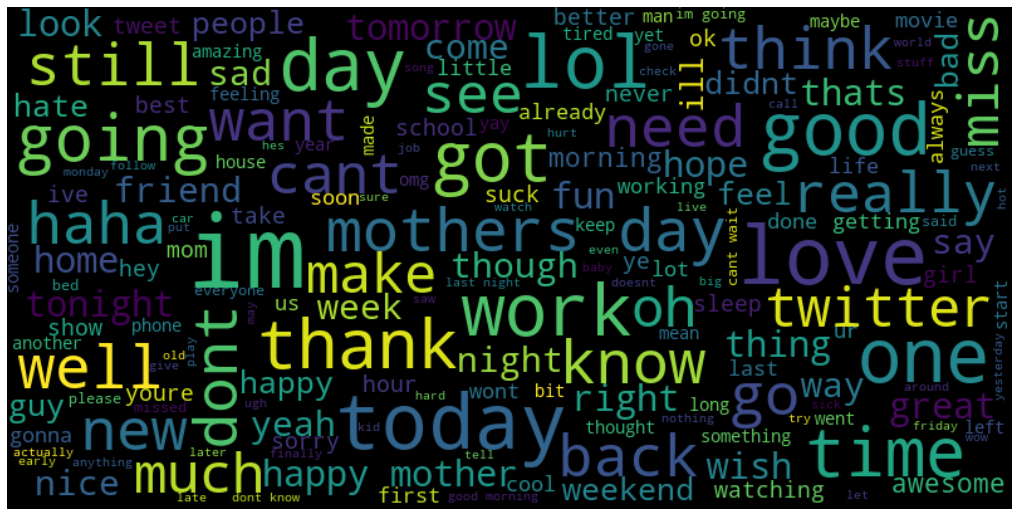

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [21]:
df['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [22]:
df = df[df['sentiment'].str.contains('neutral')==False]
df

,textID,text,selected_text,sentiment
1,549e992a42,sad miss san diego,Sooo SAD,negative
2,088c60f138,boss bullying,bullying me,negative
3,9642c003ef,interview leave alone,leave me alone,negative
4,358bd9e861,sons couldnt put releases already bought,"Sons of ****,",negative
6,6e0c6d75b1,feedings baby fun smiles coos,fun,positive
...,...,...,...,...
27475,b78ec00df5,enjoy ur night,enjoy,positive
27476,4eac33d1c0,wish could come see denver husband lost job ca...,d lost,negative
27477,4f4c4fc327,ive wondered rake client made clear net dont f...,", don`t force",negative
27478,f67aae2310,yay good enjoy break probably need hectic week...,Yay good for both of you.,positive


In [23]:
df['sentiment'] = df['sentiment'].map({'negative':0, 'positive':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df['sentiment']

1        0
2        0
3        0
4        0
6        1
        ..
27475    1
27476    0
27477    0
27478    1
27479    1
Name: sentiment, Length: 16363, dtype: int64

In [25]:
# separating the data and label
X = df['text']
y = df['sentiment']

BOW (BAG OF WORDS)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, 
                             stop_words=stopwords.words('english'))
X_ = vectorizer.fit_transform(X).toarray()
X_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_ = tfidfconverter.fit_transform(X_).toarray()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

>1, train: 0.530, test: 0.512
>2, train: 0.569, test: 0.549
>3, train: 0.656, test: 0.627
>4, train: 0.688, test: 0.655
>5, train: 0.721, test: 0.689
>6, train: 0.741, test: 0.714
>7, train: 0.758, test: 0.726
>8, train: 0.775, test: 0.745
>9, train: 0.791, test: 0.757
>10, train: 0.799, test: 0.761
>11, train: 0.807, test: 0.766
>12, train: 0.826, test: 0.786
>13, train: 0.837, test: 0.799
>14, train: 0.859, test: 0.818
>15, train: 0.855, test: 0.813
>16, train: 0.856, test: 0.817
>17, train: 0.854, test: 0.813
>18, train: 0.858, test: 0.818
>19, train: 0.863, test: 0.817
>20, train: 0.862, test: 0.819


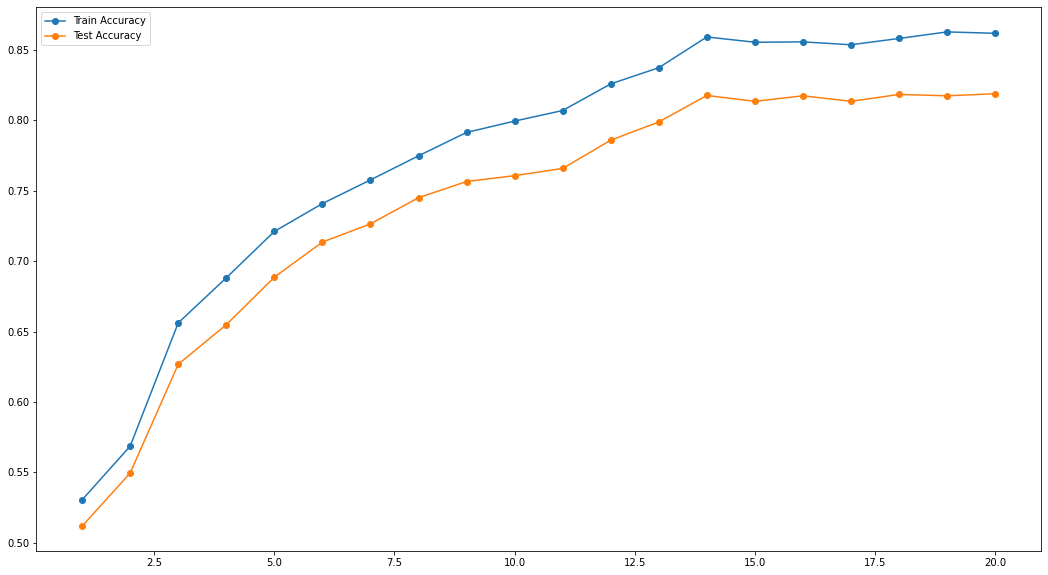

In [31]:
train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=200,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [32]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=14)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=1000, random_state=667)

Try with MultinomialNB

In [33]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [34]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8457589831337081


In [35]:
labels = ['Negative', 'Positive']

Text(69.0, 0.5, 'Actual')

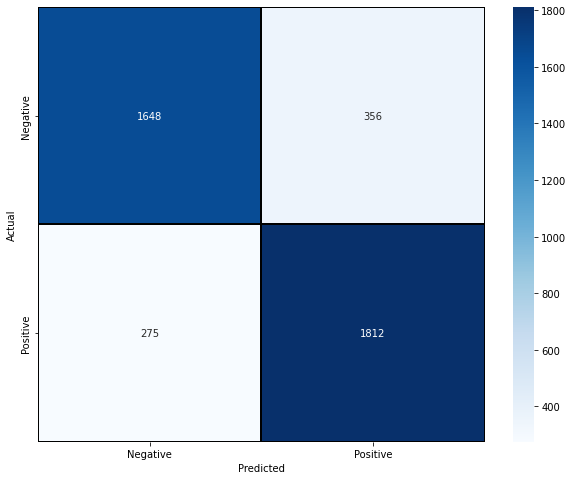

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [37]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.86      0.82      0.84      2004
    Positive       0.84      0.87      0.85      2087

    accuracy                           0.85      4091
   macro avg       0.85      0.85      0.85      4091
weighted avg       0.85      0.85      0.85      4091



In [38]:
!pip install plot-metric --quiet

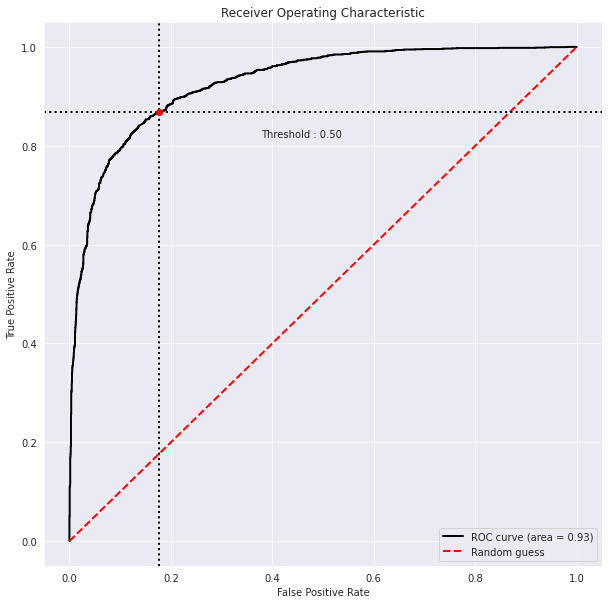

In [39]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

SGD Classifier

In [40]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8428257149841115


In [41]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.81      0.88      0.85      2004
    Positive       0.88      0.81      0.84      2087

    accuracy                           0.84      4091
   macro avg       0.84      0.84      0.84      4091
weighted avg       0.85      0.84      0.84      4091



Text(69.0, 0.5, 'Actual')

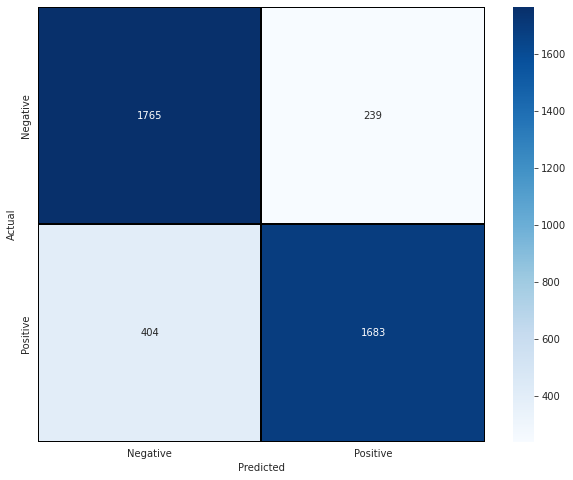

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

Final Pipeline

In [47]:
from sklearn.model_selection import train_test_split

X_array = np.array(X_) # Cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_array, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [48]:
from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7,stop_words=stopwords.words('english'))
tfidf = TfidfTransformer()
clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)

AttributeError: ignored